# I. Coding

## 0. Importing necessary packages

In [54]:
import email
import email.policy
import re
import nltk
nltk.download('words')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Preprocessing

### Extracting the stopwords

The stop words are stored in a list.

In [2]:
with open('../problem_set/stop_words.txt', 'r') as stopword_file:
    stopwords = stopword_file.readlines()
stopwords = [x.strip() for x in stopwords]

### Function to clean the email body

The email body is cleaned by (1) converting the body to tokens, (2) converting all tokens to lower case to standardize, (3) removing all nonsense words using nltk, (4) removing all stop words, and (5) joining the tokens together in a sentence again.

In [83]:
words = set(nltk.corpus.words.words())

def clean_email_body(body, stopwords):
    # split body into words
    tokens = word_tokenize(body)
    
    #convert to lowercase
    tokens = [w.lower() for w in tokens]
    
    #removes all tokens that are not alphabetic
    email_words = [word for word in tokens if word.isalpha()]
    
    # uncomment code below to retain numbers
    # email_words = [word for word in tokens if word.isalnum()]
    
    # removes all nonsensical words
    email_words = [w for w in email_words if w.lower() in words]
    
    #filter out stop words
    email_words = [w for w in email_words if not w in stopwords]
    
    clean_body = ' '.join(email_words)
    
    return clean_body

### Function to extract the email body from the email file

This extract the meaningful message from the email, thus, headers and non-body texts are removed.

In [4]:
def get_email_body(path):
    with open(path, 'rb') as file:
        b = email.message_from_binary_file(file)
    if b.is_multipart():
        for part in b.walk():
            if part.get_content_type() == 'text/plain':
                main_part = part.get_payload()
                main_part = clean_email_body(main_part, stopwords)
                return main_part
                break
    else:
        main_part = b.get_payload()
        main_part = clean_email_body(main_part, stopwords)
        return main_part

### Starts pre-processing the email files

1) The email body is extracted from the email file. 2) The email body is cleaned.

In [6]:
# NOTE: 'catdir' means category and directory
# Reading every line in the 'labels' file to get the catdir of each email file
label_file = open('../problem_set/labels', 'r')
with label_file as file:
    # Returns a list where the elements are the catdir of each email file
    # Example: ['ham ../data/000/000', 'spam ../data/000/001', ...]
    file_catdirs = file.read().splitlines()

train_set_list = []
train_set_list_ham = []
train_set_list_spam = []
test_set_list = []

# Starts processing the files
for file_catdir in file_catdirs:
    
    # Splits the catdir of the email file to easily retrieve the category and folders
    # Example: 'ham ../data/000/000' -> ['ham ..', 'data', '000', '000']
    file_details = file_catdir.split('/')
    
    # Final directory
    # Appends the directory of the email file to the parent directory; do this to avoid error
    file_dir = "../problem_set" + file_catdir[file_catdir.find('/data'):]
    # print(file_dir)
    
    # NOTE: 'bodcat' means body and category
    email_bodcat = []
    
    # Extract the email body and category to be added as a row in the train/test set
    email_bod = get_email_body(file_dir)
    
    if not(email_bod is None):
        email_bodcat.append(email_bod)
        email_cat = file_details[0]
        if email_cat[0] == 'h':
            email_bodcat.append('ham')
        else:
            email_bodcat.append('spam')
    else:
        continue
    
    # Divides the email files into train and test set based on the instructions
    # Folders 0-70 are train set, 71-127 are test set
    if (int(file_details[2]) <= 70):
        train_set_list.append(email_bodcat)
        
        # further divides the train set into train set for ham and spam
        if (file_details[0].startswith("ham")):
            train_set_list_ham.append(email_bodcat)
        else:
            train_set_list_spam.append(email_bodcat)
    else:
        test_set_list.append(email_bodcat)

In [81]:
# # uncomment this so that train set will show all ham emails first, then spam emails second
# train_set_list = train_set_list_ham + train_set_list_spam

#### Training set

In [8]:
train_df = pd.DataFrame(train_set_list, columns=['Message', 'Category'])
train_df

,Message,Category
0,list ago running set archive server official l...,ham
1,luxury buy frank muller omega tag full gold me...,spam
2,academic prestigious knowledge experience lack...,spam
3,verify subscription list charter day order chu...,ham
4,luscious continued tonsillitis,spam
...,...,...
20800,,spam
20801,special offer adobe video collection adobe pre...,spam
20802,public head meta title style body color color ...,spam
20803,mounted infrared demodulator direction mount m...,ham


#### Training set for ham

In [15]:
train_df_ham = pd.DataFrame(train_set_list_ham, columns=['Message', 'Category'])
train_df_ham

,Message,Category
0,list ago running set archive server official l...,ham
1,verify subscription list charter day order chu...,ham
2,quiet quiet well straw poll running,ham
3,working departed totally bell configuration ru...,ham
4,mass list influx bit people list person list a...,ham
...,...,...
7518,equation generate prime equation theorem prime...,ham
7519,equation generate prime equation theorem prime...,ham
7520,dear guidance generating item experiment learn...,ham
7521,built works great infrared remote fine port po...,ham


#### Training set for spam

In [14]:
train_df_spam = pd.DataFrame(train_set_list_spam, columns=['Message', 'Category'])
train_df_spam

,Message,Category
0,luxury buy frank muller omega tag full gold me...,spam
1,academic prestigious knowledge experience lack...,spam
2,luscious continued tonsillitis,spam
3,today body diet will deep distant culture sout...,spam
4,oil sector going crazy weekly gift thing going...,spam
...,...,...
13277,,spam
13278,,spam
13279,special offer adobe video collection adobe pre...,spam
13280,public head meta title style body color color ...,spam


#### Testing set

In [13]:
test_df = pd.DataFrame(test_set_list, columns=['Message', 'Category'])
test_df

,Message,Category
0,hesitantly derive perverse satisfaction midwif...,spam
1,perform experiment display will remain screen ...,ham
2,best offer month time,spam
3,de ar matter ow real st te en simply ower mont...,spam
4,special offer adobe video collection adobe pre...,spam
...,...,...
16023,great news ted price climb well marketing camp...,spam
16024,oil sector going crazy weekly gift thing going...,spam
16025,suffering pain depression heartburn help colle...,spam
16026,prosperous future money earning power respect ...,spam


### Extracting the 10000 most common words on the dataset

#### Function to convert list of tuples to dictionary

In [16]:
def convert_to_dict(tuples, dictionary):
    dictionary = dict(tuples)
    return dictionary

#### Most common words in the training set

In [17]:
train_words_freq = {}

train_df.fillna("", inplace=True)
words_freq_tuples = Counter(" ".join(train_df.Message).lower().split()).most_common(10000)

train_words_freq = convert_to_dict(words_freq_tuples, train_words_freq)
train_words_freq

{'will': 11322,
 'font': 11070,
 'board': 5227,
 'company': 5184,
 'price': 4588,
 'adobe': 4082,
 'list': 3961,
 'gold': 3896,
 'time': 3831,
 'nil': 3830,
 'help': 3805,
 'send': 3685,
 'message': 3618,
 'subject': 3580,
 'span': 3563,
 'program': 3098,
 'received': 3095,
 'work': 2784,
 'professional': 2782,
 'wrote': 2689,
 'body': 2584,
 'center': 2560,
 'good': 2492,
 'number': 2488,
 'university': 2467,
 'well': 2405,
 'de': 2377,
 'problem': 2359,
 'office': 2357,
 'file': 2313,
 'stock': 2244,
 'text': 2232,
 'table': 2161,
 'china': 2134,
 'div': 2098,
 'current': 2082,
 'add': 2055,
 'strong': 2022,
 'today': 2005,
 'news': 1991,
 'pro': 1990,
 'code': 1964,
 'development': 1935,
 'find': 1925,
 'market': 1844,
 'great': 1836,
 'read': 1826,
 'save': 1800,
 'best': 1798,
 'system': 1797,
 'people': 1785,
 'solid': 1777,
 'motor': 1776,
 'power': 1761,
 'call': 1740,
 'address': 1678,
 'handy': 1637,
 'data': 1632,
 'mail': 1605,
 'head': 1594,
 'site': 1589,
 'set': 1572,
 '

#### Most common words in the testing set

In [18]:
test_words_freq = {}

test_df.fillna("", inplace=True)
test_words_freq_tuples = Counter(" ".join(test_df.Message).lower().split()).most_common(10000)

test_words_freq = convert_to_dict(test_words_freq_tuples, test_words_freq)
test_words_freq

{'font': 13696,
 'will': 13622,
 'vulnerable': 8702,
 'received': 8084,
 'subject': 6252,
 'list': 5705,
 'file': 5563,
 'time': 5533,
 'company': 4904,
 'message': 4876,
 'number': 4247,
 'quot': 4067,
 'wrote': 4040,
 'system': 3835,
 'mail': 3831,
 'price': 3739,
 'div': 3433,
 'adobe': 3376,
 'network': 3324,
 'service': 3305,
 'university': 3302,
 'problem': 3192,
 'gold': 3179,
 'data': 3177,
 'help': 3140,
 'office': 3057,
 'work': 3020,
 'center': 2895,
 'well': 2879,
 'span': 2841,
 'send': 2836,
 'call': 2776,
 'item': 2702,
 'campaign': 2674,
 'program': 2662,
 'set': 2629,
 'table': 2550,
 'server': 2530,
 'body': 2507,
 'people': 2462,
 'news': 2458,
 'computer': 2396,
 'security': 2382,
 'professional': 2363,
 'today': 2345,
 'mon': 2330,
 'good': 2295,
 'phone': 2282,
 'access': 2223,
 'address': 2205,
 'sender': 2184,
 'version': 2175,
 'code': 2145,
 'node': 2141,
 'digest': 2085,
 'nil': 2064,
 'video': 2032,
 'best': 2026,
 'day': 2025,
 'web': 2022,
 'strong': 2020,

## 2. Creating the feature matrix

### Function to create feature matrix

Returns a list of list where each list contains the number of times words from the vocabulary appeared in the email bodies. This is then converted into a data frame, as shown in the next block of code.

In [19]:
# emails = [["Hello Good morning morning I am great", "spam"],
#          ["Hi Good evening I am tired", "ham"],
#          ["Hola Como esta", "spam"]]
# words = ["good", "am", "morning", "evening", "tired"]

def create_feature_matrix(emails, words):
    feature_matrix = []
    for email in emails:
        row = []
        
        # appends the class type of the email
        row.append(email[1])
        
        for word in words:
            email_body = email[0].lower().split()
            word_count = email_body.count(word)
            row.append(word_count)

        feature_matrix.append(row)

    return feature_matrix

# create_feature_matrix(emails, words)

#### Feature matrix for training set

In [20]:
train_words = list(train_words_freq.keys())
feature_list_train = create_feature_matrix(train_set_list, train_words)
train_words.insert(0, 'class_type')
feature_matrix_train = pd.DataFrame(feature_list_train, columns=train_words)

In [21]:
feature_matrix_train

,class_type,will,font,board,company,price,adobe,list,gold,time,...,recurring,subsection,toothless,immoral,pamphlet,ascribe,folded,grading,sunny,habit
0,ham,2,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,spam,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20800,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20801,spam,0,0,0,0,6,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20802,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20803,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature matrix for ham training set

Just a subset of the feature matrix for whole training set.

In [22]:
feature_matrix_ham = feature_matrix_train.loc[feature_matrix_train['class_type'] == 'ham']
feature_matrix_ham

,class_type,will,font,board,company,price,adobe,list,gold,time,...,recurring,subsection,toothless,immoral,pamphlet,ascribe,folded,grading,sunny,habit
0,ham,2,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ham,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,ham,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20776,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20793,ham,1,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
20798,ham,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature matrix for spam training set

Just a subset of the feature matrix for whole training set.

In [23]:
feature_matrix_spam = feature_matrix_train.loc[feature_matrix_train['class_type'] == 'spam']
feature_matrix_spam

,class_type,will,font,board,company,price,adobe,list,gold,time,...,recurring,subsection,toothless,immoral,pamphlet,ascribe,folded,grading,sunny,habit
1,spam,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,spam,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,spam,6,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20799,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20800,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20801,spam,0,0,0,0,6,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20802,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature matrix for testing set

In [24]:
test_words = list(test_words_freq.keys())
feature_list_test = create_feature_matrix(test_set_list, test_words)
test_words.insert(0, 'class_type')
feature_matrix_test = pd.DataFrame(feature_list_test, columns=test_words)

In [25]:
feature_matrix_test

,class_type,font,will,vulnerable,received,subject,list,file,time,company,...,terminus,sabbatical,dom,recomputation,wainwright,habitat,technocracy,ideology,quo,overshadow
0,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,3,0,0,2,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16023,spam,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16024,spam,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16025,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16026,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Computing the priors

### Number of ham and spam emails and total number of emails

In [82]:
n_ham = train_df_ham.shape[0]
n_spam = train_df_spam.shape[0]
n_doc = n_ham + n_spam

print("Number of ham emails: " + str(n_ham))
print("Number of spam emails: " + str(n_spam))
print("Total number of emails: " + str(n_doc))

Number of ham emails: 7523
Number of spam emails: 13282
Total number of emails: 20805


The total number of emails was reduced (it's supposed to be 21,300) because some email have a NoneType body and was removed from the training set.

### Prior probability for ham

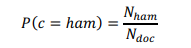

In [27]:
p_ham = n_ham/n_doc
p_ham

0.36159577024753664

### Prior probability for spam

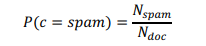

In [28]:
p_spam = n_spam/n_doc
p_spam

0.6384042297524634

## 4. Computing the Likelihood of each word (with Laplace smoothing)

### Dictionary containing the number of occurrences of each word in the dataset

Dictionary was used to make checking the frequency of specific words easier.

In [29]:
word_occurences = {}
words = list(train_words_freq.keys())
for word in words:
    word_occurences[word] = feature_matrix_train[word].sum()

word_occurences

{'will': 11322,
 'font': 11070,
 'board': 5227,
 'company': 5184,
 'price': 4588,
 'adobe': 4082,
 'list': 3961,
 'gold': 3896,
 'time': 3831,
 'nil': 3830,
 'help': 3805,
 'send': 3685,
 'message': 3618,
 'subject': 3580,
 'span': 3563,
 'program': 3098,
 'received': 3095,
 'work': 2784,
 'professional': 2782,
 'wrote': 2689,
 'body': 2584,
 'center': 2560,
 'good': 2492,
 'number': 2488,
 'university': 2467,
 'well': 2405,
 'de': 2377,
 'problem': 2359,
 'office': 2357,
 'file': 2313,
 'stock': 2244,
 'text': 2232,
 'table': 2161,
 'china': 2134,
 'div': 2098,
 'current': 2082,
 'add': 2055,
 'strong': 2022,
 'today': 2005,
 'news': 1991,
 'pro': 1990,
 'code': 1964,
 'development': 1935,
 'find': 1925,
 'market': 1844,
 'great': 1836,
 'read': 1826,
 'save': 1800,
 'best': 1798,
 'system': 1797,
 'people': 1785,
 'solid': 1777,
 'motor': 1776,
 'power': 1761,
 'call': 1740,
 'address': 1678,
 'handy': 1637,
 'data': 1632,
 'mail': 1605,
 'head': 1594,
 'site': 1589,
 'set': 1572,
 '

### Dictionary containing the number of occurrences of each word in the ham vocabulary

In [30]:
ham_word_occurences = {}
words = list(train_words_freq.keys())
for word in words:
    word_occurences = feature_matrix_ham[word].sum()
    if word_occurences > 0:
        ham_word_occurences[word] = word_occurences
ham_word_occurences

{'will': 6520,
 'font': 504,
 'board': 4707,
 'company': 257,
 'price': 167,
 'adobe': 19,
 'list': 3649,
 'gold': 94,
 'time': 2682,
 'nil': 3830,
 'help': 3027,
 'send': 3413,
 'message': 3116,
 'subject': 3505,
 'span': 37,
 'program': 2107,
 'received': 2733,
 'work': 2536,
 'professional': 68,
 'wrote': 2594,
 'body': 941,
 'center': 446,
 'good': 1881,
 'number': 1053,
 'university': 2429,
 'well': 1433,
 'de': 883,
 'problem': 2287,
 'office': 403,
 'file': 2129,
 'stock': 112,
 'text': 1630,
 'table': 196,
 'china': 46,
 'div': 202,
 'current': 939,
 'add': 520,
 'strong': 127,
 'today': 308,
 'news': 275,
 'pro': 65,
 'code': 1869,
 'development': 403,
 'find': 1477,
 'market': 74,
 'great': 573,
 'read': 1057,
 'save': 241,
 'best': 819,
 'system': 1559,
 'people': 1349,
 'solid': 83,
 'motor': 1770,
 'power': 1548,
 'call': 638,
 'address': 1205,
 'handy': 1637,
 'data': 1418,
 'mail': 1400,
 'head': 152,
 'site': 1027,
 'set': 1455,
 'days': 341,
 'free': 901,
 'left': 451,

### Dictionary containing the number of occurrences of each word in the spam vocabulary

In [31]:
spam_word_occurences = {}
words = list(train_words_freq.keys())
for word in words:
    word_occurences = feature_matrix_spam[word].sum()
    if word_occurences > 0:
        spam_word_occurences[word] = word_occurences
spam_word_occurences

{'will': 4802,
 'font': 10566,
 'board': 520,
 'company': 4927,
 'price': 4421,
 'adobe': 4063,
 'list': 312,
 'gold': 3802,
 'time': 1149,
 'help': 778,
 'send': 272,
 'message': 502,
 'subject': 75,
 'span': 3526,
 'program': 991,
 'received': 362,
 'work': 248,
 'professional': 2714,
 'wrote': 95,
 'body': 1643,
 'center': 2114,
 'good': 611,
 'number': 1435,
 'university': 38,
 'well': 972,
 'de': 1494,
 'problem': 72,
 'office': 1954,
 'file': 184,
 'stock': 2132,
 'text': 602,
 'table': 1965,
 'china': 2088,
 'div': 1896,
 'current': 1143,
 'add': 1535,
 'strong': 1895,
 'today': 1697,
 'news': 1716,
 'pro': 1925,
 'code': 95,
 'development': 1532,
 'find': 448,
 'market': 1770,
 'great': 1263,
 'read': 769,
 'save': 1559,
 'best': 979,
 'system': 238,
 'people': 436,
 'solid': 1694,
 'motor': 6,
 'power': 213,
 'call': 1102,
 'address': 473,
 'data': 214,
 'mail': 205,
 'head': 1442,
 'site': 562,
 'set': 117,
 'days': 1226,
 'free': 658,
 'left': 1085,
 'subscribe': 24,
 'life'

### Functions and values used to compute the likelihood of words

#### Func1: Function to count the number of occurences of a word in a class 

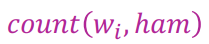

In [32]:
# counts the number of occurence of a word given a class type (i.e., ham or spam)
def count_word_in_class(word, word_occurences_in_class):
    if word in word_occurences_in_class:
        word_count = word_occurences_in_class[word]
        return word_count
    else:
        word_count = 0
        return word_count

# count_word_in_class('font', spam_word_occurences)

#### Func2: Function to count the total number of word occurences in a class

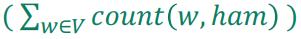

In [33]:
# counts the total number of word occurences in a class type
def total_words_in_class(word_occurences_in_class):
    total = sum(word_occurences_in_class.values())
    return total

# total_words_in_class(spam_word_occurences)

#### Val1: The lambda value

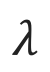

In [34]:
λ = 1

#### Val2: The |V| or total number of unique words

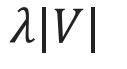

In [38]:
total_unique_words = len(train_words_freq)
total_unique_words

10000

### Computing the likelihood of a word (with Laplace smoothing)

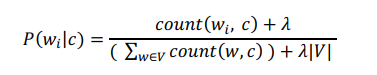

In [39]:
def compute_word_likelihood_in_class(word, word_occurences_in_class, class_type, λ, total_unique_words):
    numerator = count_word_in_class(word, word_occurences_in_class) + λ
    denominator = total_words_in_class(word_occurences_in_class) + (λ*total_unique_words)
    likelihood = numerator/denominator
    return likelihood

# compute_word_likelihood_in_class('font', spam_word_occurences, 'spam', λ, total_unique_words)

## 5. Classifying the emails (computed using log probabilities)

### Formula of the Naive Bayes classifier using log probabilities

#### Function to get the summation of the log probabilities of words in the document given the class

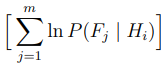

In [40]:
def get_sum_words_logprob(email_words, word_occurences_in_class, class_type, λ, total_unique_words):
    logprobs = []
    for word in email_words:
        word_prob = compute_word_likelihood_in_class(word, word_occurences_in_class, class_type, λ, total_unique_words)
        word_logprob = np.log(word_prob)
        logprobs.append(word_logprob)
    return np.sum(logprobs)
    

#### The Naive Bayes classifier using log probabilities

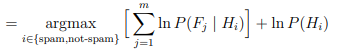

In [41]:
def naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words):
    class_probs = {'ham': 0, 'spam': 0}
    class_types = list(class_probs.keys())
    
    for class_type in class_types:
        class_prior_logprob = 0
        if class_type == 'ham':
            sum_words_logprob = get_sum_words_logprob(email_words, ham_word_occurences, class_type, λ, total_unique_words)
            class_prior_logprob = np.log(p_ham)
        else:
            sum_words_logprob = get_sum_words_logprob(email_words, spam_word_occurences, class_type, λ, total_unique_words)
            class_prior_logprob = np.log(p_spam)
        
        class_prob = sum_words_logprob + class_prior_logprob
        class_probs[class_type] = class_prob
        
    final_class = max(class_probs, key=class_probs.get)
    
    return final_class

## 6. Testing the Classifier

### Using the Naive Bayes on an unknown message (sample)

In [57]:
email_body = 'best offer month time' # this is actually a spam
email_words = email_body.split(" ")
result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
print(result)

spam


### Using the Naive Bayes classifier on the testing set

In [47]:
predicted = []
actual = list(test_df['Category'])

emails = list(test_df['Message'])

for email in emails:
    email_words = email.split(" ")
    result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
    predicted.append(result)

## 7. Performance Evaluation

### Main Evaluation

#### Confusion matrix

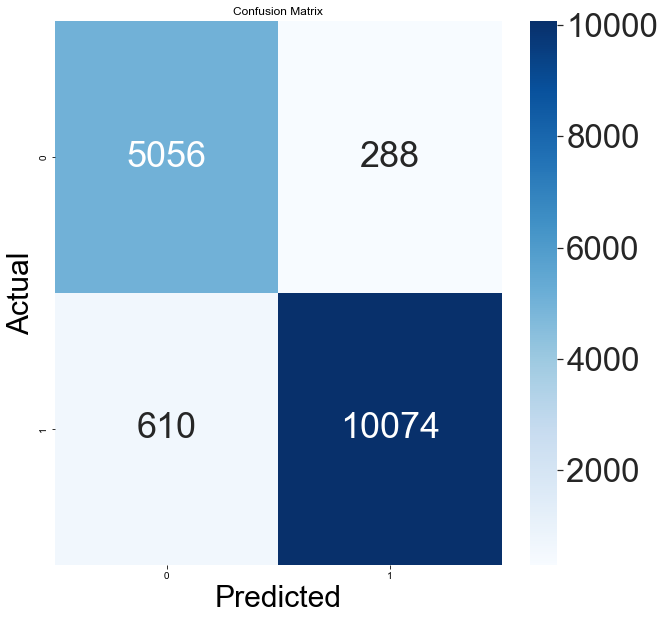

In [55]:
cm = confusion_matrix(actual, predicted)
plt.figure(figsize=(10, 10))
plt.title("Confusion Matrix")
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
label_font = {'size':'30'}
plt.xlabel('Predicted', fontdict=label_font)
plt.ylabel('Actual', fontdict=label_font)
plt.show()

#### Classification report in terms of accuracy, recall, and precision

In [80]:
# Accuracy, recall, precision
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted, average="binary", pos_label="spam")
precision = precision_score(actual, predicted, average="binary", pos_label="spam")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 94.40%
Recall: 94.29%
Precision: 97.22%


## Testing the classifier with different lambda values

### NB Classifier given λ = 2.0

#### Testing

In [92]:
λ = 2

predicted = []
actual = list(test_df['Category'])

emails = list(test_df['Message'])

for email in emails:
    email_words = email.split(" ")
    result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
    predicted.append(result)

#### Evaluation

In [93]:
# Accuracy, recall, precision
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted, average="binary", pos_label="spam")
precision = precision_score(actual, predicted, average="binary", pos_label="spam")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 94.33%
Recall: 94.29%
Precision: 97.12%


### NB Classifier given λ = 0.5

#### Testing

In [101]:
λ = 0.5

predicted = []
actual = list(test_df['Category'])

emails = list(test_df['Message'])

for email in emails:
    email_words = email.split(" ")
    result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
    predicted.append(result)

#### Evaluation

In [102]:
# Accuracy, recall, precision
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted, average="binary", pos_label="spam")
precision = precision_score(actual, predicted, average="binary", pos_label="spam")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 94.42%
Recall: 94.23%
Precision: 97.32%


### NB Classifier given λ = 0.1

#### Testing

In [103]:
λ = 0.1

predicted = []
actual = list(test_df['Category'])

emails = list(test_df['Message'])

for email in emails:
    email_words = email.split(" ")
    result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
    predicted.append(result)

#### Evaluation

In [104]:
# Accuracy, recall, precision
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted, average="binary", pos_label="spam")
precision = precision_score(actual, predicted, average="binary", pos_label="spam")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 94.39%
Recall: 94.08%
Precision: 97.41%


### NB Classifier given λ = 0.005

#### Testing

In [105]:
λ = 0.005

predicted = []
actual = list(test_df['Category'])

emails = list(test_df['Message'])

for email in emails:
    email_words = email.split(" ")
    result = naive_bayes_classifier(p_ham, p_spam, email_words, ham_word_occurences, spam_word_occurences, λ, total_unique_words)
    predicted.append(result)

#### Evaluation

In [106]:
# Accuracy, recall, precision
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted, average="binary", pos_label="spam")
precision = precision_score(actual, predicted, average="binary", pos_label="spam")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 94.24%
Recall: 93.77%
Precision: 97.49%


# II. Guide Questions

A pdf of these answers is also submitted.

1. What is the effect of removing stop words in terms of precision, recall, and accuracy? 
Show a plot or a table of these results.

Answer: After removing the stop words in the email bodies, the accuracy and recall significantly increased while the precision stays almost the same. This implies that removing the stop words in the email bodies can increase the classifier’s likelihood of correctly classifying an email as spam or ham, as well as the likelihood that actual spam is predicted as spam. However, the likelihood that a predicted spam is actually spam is not affected.
Here's a table comparing the classification report of the NB classifier without and with stop words in the email body.

In [90]:
perf = pd.DataFrame({'Dataset': ['no stop words', 'with stop words'],
                    'Accuracy': [accuracy, 0.8560019965061143],
                    'Recall': [recall, 0.8027892175215275],
                    'Precision': [precision, 0.9771018455228981]})
perf.set_index('Dataset', inplace=True)
perf

,Accuracy,Recall,Precision
Dataset,,,
no stop words,0.943973,0.942905,0.972206
with stop words,0.856002,0.802789,0.977102


2. Experiment on the number of words used for training. Filter the dictionary to include only 
words occurring more than k times (1000 words, then k > 100, and k = 50 times). For 
example, the word “offer” appears 150 times, that means that it will be included in the 
dictionary.

Answer: The number of words used for training affects the performance of the classifier. For instance, when the words used for training is limited only to words that have a frequency of more than 150, the accuracy, recall, and precision decreases slightly. The report below shows that the scores have decreased compared to when the number of unique words is 10000 (see table above)

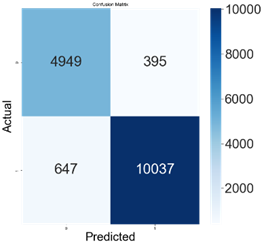

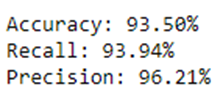

A probable cause for this is that reducing the cardinality of the vocabulary would result in missing some spam words that are not frequent in the training set, thus, the reduced performance. Reducing the cardinality of the vocabulary, however, can decrease the training duration.

3.	Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005). Evaluate performance metrics for each.

In [107]:
perf = pd.DataFrame({'Dataset': [0.005, 0.1, 0.5, 1.0, 2.0],
                    'Accuracy': ['94.24%', '94.39%', '94.42%', '94.40%', '94.33%'],
                    'Recall': ['93.77%', '94.08%', '94.23%', '94.29%', '94.29%'],
                    'Precision': ['97.49%', '97.41%', '97.32%', '97.22%', '97.12%']})
perf.set_index('Dataset', inplace=True)
perf

,Accuracy,Recall,Precision
Dataset,,,
0.005,94.24%,93.77%,97.49%
0.100,94.39%,94.08%,97.41%
0.500,94.42%,94.23%,97.32%
1.000,94.40%,94.29%,97.22%
2.000,94.33%,94.29%,97.12%


There is no significant difference in the performance of the classifiers with varying lambda values. However, some trends are observable. Figure 4 shows that as the lambda increases, the recall increases while the precision decreases. Moreover, accuracy is the highest when the lambda is 0.5. However, it starts to decrease as the lambda value increases or decreases from 0.5.

4.	What are your recommendations to further improve the model?

Answer: Here are a few recommendations to further improve the model:


A more standardized dataset can be used. The emails in the dataset used have varying encoding systems which make decoding more difficult. Due to this, I ended up using a more generalized way to decode which might have missed some words in some email bodies.


The email bodies can be cleaned further using techniques like stemming and lemmatization. Stemming can be used to group words based on their root stem and be referred to as one single word (e.g., standing, stands, and stood can be reduced to just stand). Lemmatization can be used to group words based on their root definition and be referred to as one sing word as well (e.g., stands and stand can be reduced to just stand). This can significantly reduce the cardinality of the vocabulary which can reduce training duration.
